In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('stack_overflow_questions_data.csv')

In [3]:
df.head(5)

,Question,Votes,Answers,Views,Tags,Date
0,"Concatenate year, month, day and time problem ...",0,3,20,"['r', 'dataframe', 'datetime', 'dplyr']",15 secs ago
1,Why is spring boot returning empty for current...,0,1,16,"['java', 'spring', 'spring-boot', 'spring-secu...",49 secs ago
2,What is the idiomatic Go equivalent of C's ter...,513,14,375k,"['go', 'ternary-operator', 'conditional-operat...",50 secs ago
3,How to properly test a AWS Backup plan,0,0,2,"['amazon-web-services', 'aws-backup']",53 secs ago
4,Cannot install Openvino with pip,5,4,6k,"['python', 'pip', 'openvino']",53 secs ago


##### Top questions based on views. It can also be a proxy for most common questions that people encounter.

In [4]:
def to_thousands(value):
    if value[-1] == 'k':
        val = int(value[:-1])*1000
        return (val)
    else:
        return int(value)

df['Views'] = df['Views'].apply(to_thousands)

In [5]:
new_df_views =  df.sort_values(by='Views',ascending=False)

In [6]:
new_df_views.reset_index(drop=True,inplace=True)

In [7]:
new_df_views.columns

Index(['Question', 'Votes', 'Answers', 'Views', 'Tags', 'Date'], dtype='object')

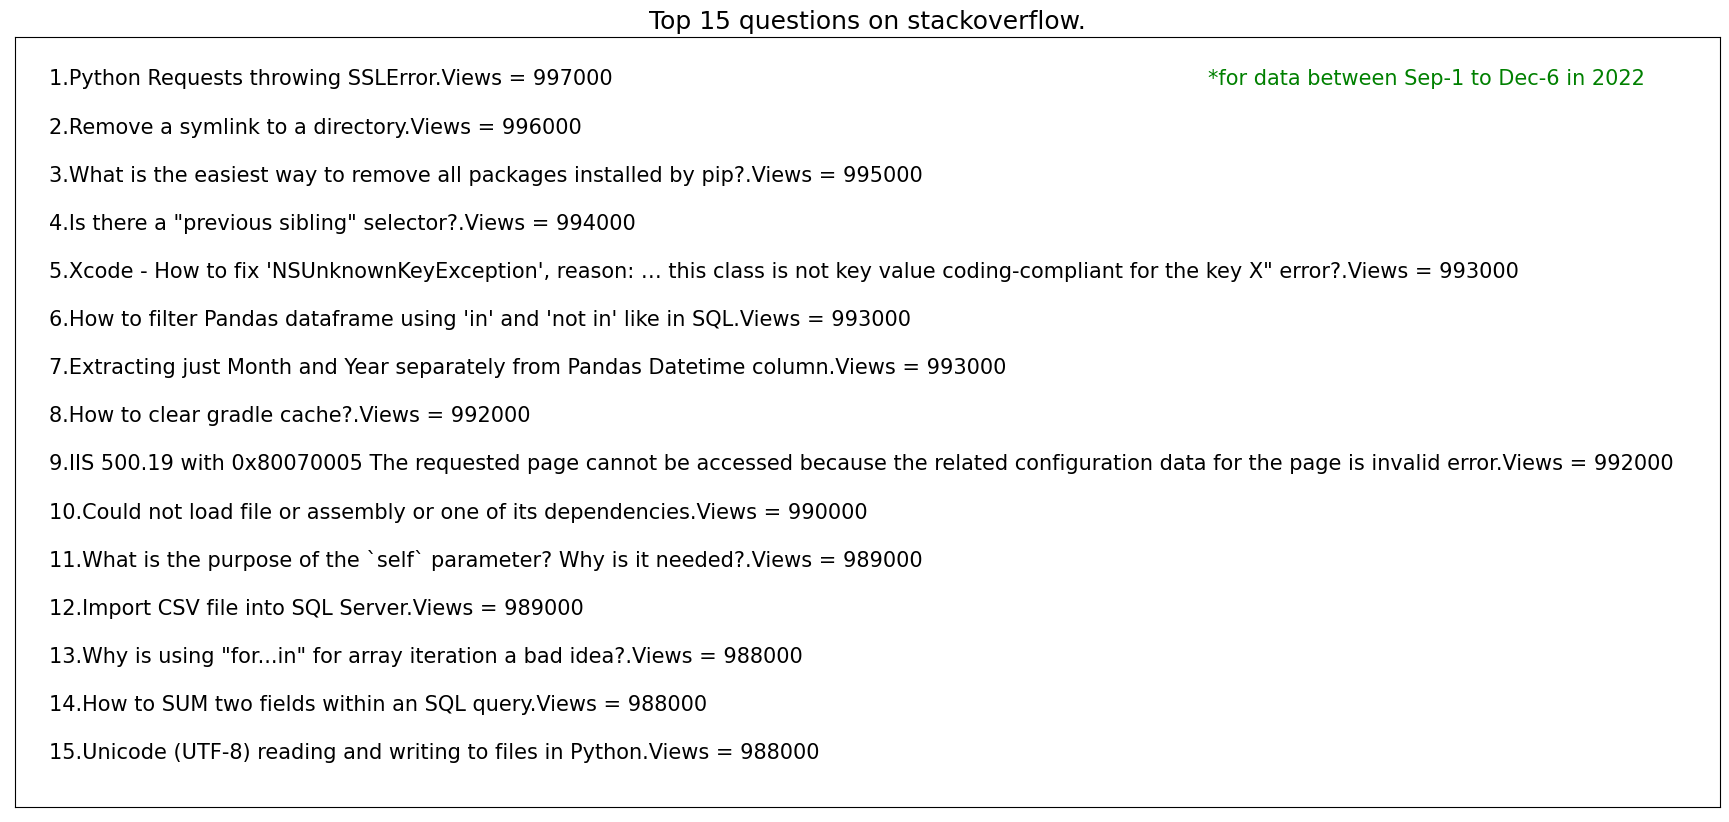

In [8]:
plt.figure(figsize=(22,10))

for i in range(15):
    plt.text(x=0.1,y=15-i,s=f"{i+1}.{new_df_views.iloc[i]['Question']}.Views = {new_df_views.iloc[i]['Views']}",fontsize=15)
plt.text(x=3.5,y=15,s="*for data between Sep-1 to Dec-6 in 2022",fontsize=15,color="green")
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.ylim([0,16])
plt.xlim([0,5])
plt.title("Top 15 questions on stackoverflow.",fontsize=18)
plt.show()

##### Finding the trend of topics in the dataset by month.

In [9]:
nov_loc = df.loc[df['Date'] == "Nov 30 at 23:59"].index.values[0]
oct_loc = df.loc[df['Date'] == "Oct 31 at 23:58"].index.values[0]
sep_loc = df.loc[df['Date'] == "Sep 30 at 23:54"].index.values[0]

In [10]:
nov_loc,oct_loc,sep_loc

(44489, 267133, 461630)

In [11]:
df.iloc[oct_loc:sep_loc].shape

(194497, 6)

In [12]:
#adding extra column for using groupby function.(sep=1,oct=2,nov=3,dec=4)

new_df = df.copy(deep=True)
new_df['month']= 0

In [13]:
new_df['month'].loc[:nov_loc] = 4
new_df['month'].loc[nov_loc:oct_loc] = 3
new_df['month'].loc[oct_loc:sep_loc] = 2
new_df['month'].loc[sep_loc:] =1

In [25]:
def to_count_series(grouped_object,number):

    tags_list = []
    def tags_extract(value):
        helper_list =[]
        helper_list = value.split(",")
        for index in range(len(helper_list)):
            tags_list.append(helper_list[index].strip("[' ' ]'"))
    present_month = grouped_object.get_group(number)
    present_month.reset_index(drop=True, inplace=True)

    
    present_month['Tags'].apply(tags_extract)
    present_tag_series = pd.Series(data=tags_list)

    return present_tag_series.value_counts()

In [26]:
grouped_month = new_df.groupby('month')

In [68]:
sep_count =to_count_series(grouped_month, 1)
oct_count = to_count_series(grouped_month,2)
nov_count = to_count_series(grouped_month,3)
dec_count = to_count_series(grouped_month,4)

In [77]:
def to_dataframe(series_object,month_name):
    helper_df = pd.DataFrame(data=series_object[:10],columns=['count'])
    helper_df.reset_index(inplace=True)
    helper_df.rename(columns={'index':'Topic'},inplace=True)
    helper_df['month'] = month_name

    return helper_df

In [78]:
sep_df = to_dataframe(sep_count,'september')
oct_df = to_dataframe(oct_count,'october')
nov_df = to_dataframe(nov_count,'november')

In [80]:
new_df = pd.concat([sep_df,oct_df,nov_df])

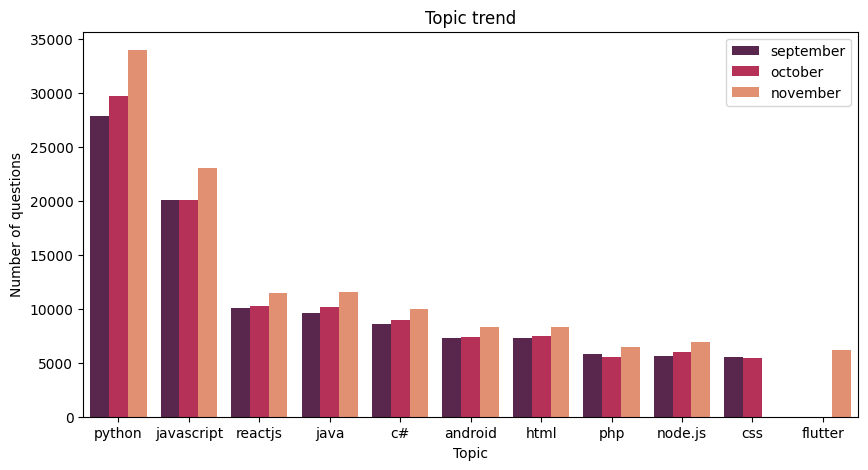

In [111]:
plt.figure(figsize=(10,5))
sns.barplot(data=new_df, x="Topic",y="count",hue="month",palette="rocket")
plt.legend(loc="upper right")
plt.ylabel("Number of questions")
plt.title("Topic trend")
plt.show()

In [227]:
#taking rank
values_dict={}
for topic in new_df['Topic'].unique():
    rank = new_df.loc[new_df['Topic'] == topic].index.values+1
    values_dict.update({topic:list(rank)})

In [228]:
values_dict['css'] = [11,10,10]
values_dict['flutter'] = [11,11,10]

In [229]:
from bumpplot import bumpchart

rank_df = pd.DataFrame(data=values_dict, index=['september','october','november'])
rank_df

,python,javascript,reactjs,java,c#,android,html,php,node.js,css,flutter
september,1,2,3,4,5,6,7,8,9,11,11
october,1,2,3,4,5,7,6,9,8,10,11
november,1,2,4,3,5,7,6,9,8,10,10


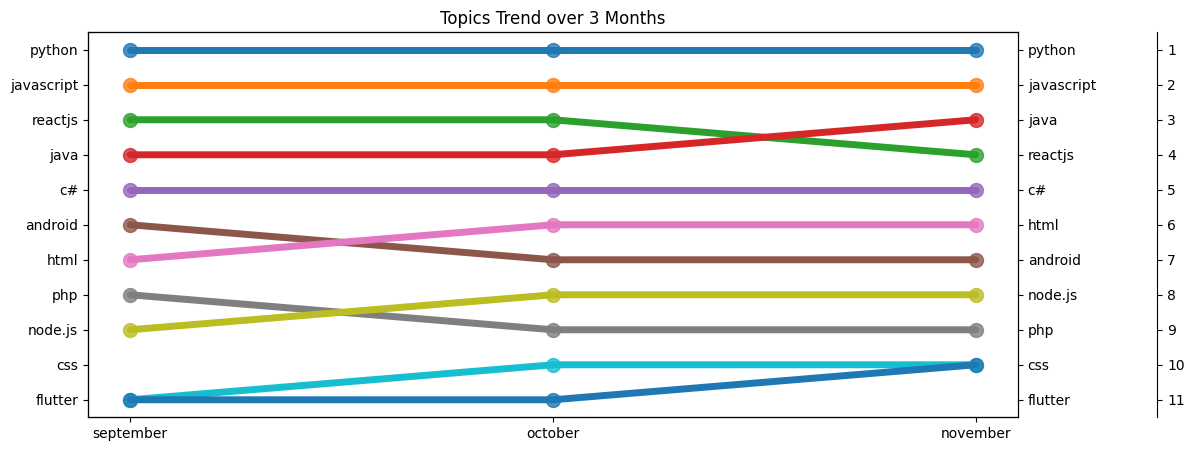

In [231]:
plt.figure(figsize=(12,5))
bumpchart(rank_df,show_rank_axis= True, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 1}, scatter_args= {"s": 100, "alpha": 0.8},
          rank_axis_distance=1.15)
plt.title("Topics Trend over 3 Months")
plt.show()